# **<span style="color:orange">Calcul de trajectoire dans un champ de gravité</span>**

## Introduction rapide

Au cours du projet on va apprendre à programmer différents modèles pour étudier **des trajectoires de corps dans un champ de gravité.**

Il existe différents modèles qu'on va étudier, programmer et analyser,  au cours des séances et entre les séances.

Le projet est basé sur un principe simple : 

<div class="alert alert-block alert-danger"> <b>ATTENTION ! </b>
1h de travail en cours est accompagnée d'au moins 1h de travail en dehors des cours.
</div>
  

## Evaluation

Les points suivants seront notés:

* Travail en séances (30 %)
* Travail en dehors des séances (30%)
* Qualité du code rendus au format jupyter notebook (40%)

Le code (dernier item) ne sera évalué que s'il y a eu travail effectif et vérifié par l'enseignant en séance et entre les séances. Aucun travail vérifiable = 0 au projet (présomption de plagiat)

<div class="alert alert-block alert-danger"> <b>ATTENTION ! </b>
 Une attention particulière sera portée sur le  <b>plagiat</b>.
</div>


## Travail à mener

* A chaque séance des objectifs à atteindre pour la prochaine séance sont définis. Le travail doit être posté sur Moodle avant la séance suivante et il sera évalué. Pas de retard toléré d'une séance sur l'autre.

* Les séances permettent de présenter le modèle à implémenter et d'aider les étudiants

* Le projet peut se faire par binôme, mais pas plus, et ce n'est pas obligatoire.

## Démarche de programmation

Le code principal sera toujours situé en bas de la zone de code, dans le script principal, et les fonctions
sont toujours placées en haut, après les imports.

On va utiliser des classes qui est le meilleur moyen d'implémenter différents modèles. 

<div class="alert alert-block alert-info"> <b>NOTE</b> 
Ici on travaille dans Jupyter Notebook, mais normalement, on positionne les classes dans des <b>modules</b>  personnels, qu'on appelle ensuite comme on le fait actuellement avec Numpy ou Matplolib.
</div>

Quelques explications sur la création, le fonctionnement et l'utilisation des classes viendront au fur et à mesure, avec un apprentissage basé sur l'exemple (et le travail personnel).

# **<span style="color:red">Séance 1: implémentation du modèle classique de balistique, sans frottement</span>**

## **<span style="color:navy">1 - Equations principales</span>**
C'est le modèle point matériel (objet assimilé à un point de masse m) le plus simple qu'on puisse trouver et les notations sont indiquées par l'image ci-dessous:

<img src="images/modele4.png" width="500">

<center>
    Figure 1: a) Trajectoire, b) Répartition des forces sur un point de la trajectoire. $L$: portance, $D$: traînée,
    $F$: force de propulsion, $mg$: poids.
</center>


Les équations de ce modèle sont rappelées ici.

* L'accélération et la vitesse sont données par:
  
  $$ a = - g, \qquad v_x = v_0 \cos \alpha, \qquad  v_z = v_0 \sin\alpha - g t, \qquad v= \sqrt{v_x^2 + v_z^2} $$

* La position est répérée par:

$$ z =  -\dfrac{g}{2} t^2 + v_0 \sin \alpha ~ t + h, \qquad x = v_0 \cos\alpha~t   $$
  
  en remplaçant $t = \dfrac{x}{v_0 \cos\alpha}$ dans $z(t)$ on obtient la **trajactoire parabolique**:
 
<div class="alert alert-block alert-warning">
<b>
 $$
  z = -\dfrac{g}{2} \dfrac{x^2}{v_0^2 \cos^2\alpha} + \tan\alpha ~ x + h
  $$
</b>
</div>


* le point d'impact est défini à partir de son temps et de la portée $L=x_i$ ($z_i=0$):

    $$
    \displaystyle t_i = \dfrac{v_0 \sin \alpha + \sqrt{(v_0 \sin \alpha)^2 + 2 g h}}{g}, \qquad
    x_i = v_0 \cos\alpha~t_i, \qquad  \theta_i = \arctan\dfrac{v_z(t_i)}{v_x(t_i)}
    $$


    On a l'angle de l'impact et on peut aussi avoir le module de la vitesse.
 
   La **portée maximale** peut s'écrite sous la forme:
   


   On peut remarquer que la portée sera maximale pour la valeur de $\alpha$ qui vérifie:

<div class="alert alert-block alert-warning">
<b>
   $$
   f(\alpha) = 0 = \cos2\alpha + \dfrac{\sin\alpha~~ (\cos2\alpha -\mathcal{L})}{\sqrt{\sin^2\alpha + \mathcal{L}}} 
   \tag{eq. 1}$$
</b>
</div>

    
   
   On retrouve le résultat connu de l'angle optimal de 45° si $h=0$. Sinon l'angle est inférieur à 45°.

*  On sait que la trajectoire est une parabole et son apogée est atteinte quand $v_z=0$, on a alors:

$$ t_1 = \dfrac{v_0\sin\alpha}{g}, \qquad \qquad v(t_1) = v_x, \qquad h_1 = z(t_1) $$


## **<span style="color:navy">2 - Apprentissage des classes</span>**

### **<span style="color:blue">2 - 1 Quelques généralités </span>**

<div class="alert alert-block alert-success"> <b>INFO</b> 
Les classes sont employées dans la  <b>Programmation Orientée Objet</b> (POO). De nos jours il devient très difficile de
s'intégrer dans un projet de recherche ou industriel, où on doit utiliser ou créer du code, sans connaître les 
bases de la POO.
</div>
  
* Un classe est un objet Python qui sert de modèle pour créer d'autres objets de même type.
C'est ce qu'on appelle un **conteneur**. Le contenant est constitué d'attributs et de méthodes qui sont discutés juste après.

* Non seulement les classes sont très employées, mais c'est souvent le meilleure façon de programmer.

* Nous allons voir ici uniquement quelques notions très basiques. 

* Ici on va définir une classe pour le modèle 4 avec 3 paramètres d'entrée **v_0, h** et **alpha**

* L'angle $\alpha$ est en degrés et que les autres grandeurs sont dans les unités SI.
    



<div class="alert alert-block alert-success"> <b>A RETENIR</b> 
 La classe est définie par un nom avec l'instruction <b>class</b>. 
Le mot <b>self</b> fait référence à la classe elle-même, il transporte (on parle d'encapsulation) toutes les variables (appelées attributs)
et toutes les fonctions (appelées méthodes) qui sont incluses dans la classe.
</div>


C'est très pratique puisque cela évite d'écrire à chaque fois trop d'arguments dans les méthodes et d'avoir accès très facilement aux divers éléments de la classe.

Les attributs agissent comme des variables globales dans la classe.

Les attribut sont idendifiées  par un nom commençant par **self.nom_attribut**

<div class="alert alert-block alert-info"> <b>NOTE</b> 
Sur le cours Moodle affectée à ce projet, se trouve une fiche d'apprentissage sur les classes en python et la POO, du niveau lycée. Il est fortement conseiller de le consulter (si possible en dehors de la séance).
</div>

### **<span style="color:blue">2 - 2 Premier exemple de code pour définir une classe </span>**

In [1]:
import numpy as np                # module de math
import matplotlib.pyplot as plt   # module graphique
G = 9.81                          # constante en m/s^2

class Modele4(object):
    def __init__(self, h=10, v_0=10, alpha=30):
        """ Le constructeur de classe est lancé dès la création de la classe"""
        self.h = h
        self.v_0 = v_0
        self.alpha = np.deg2rad(alpha)  # on met alpha en radians directement
        self.initial_message()
    
    
    def initial_message(self):
        print("="*40 +"\n Création d'une instance du modèle 4 \n","="*39)
        print("h      : %.2f m" % self.h)
        print("v_0    : %.2f m/s" % self.v_0)
        print("alpha  : %.2f °" % np.rad2deg(self.alpha))
        
        
    def set_velocity(self, t):
        v_z = self.v_0 * np.sin(self.alpha) - G * t
        v_x = self.v_0 * np.cos(self.alpha)
        v = np.sqrt(v_x**2 + v_z**2)
        return v_x, v_z, v
    
    
    def set_impact_values(self):
        """
        retourne les valeurs temps, portée, vitesse et angle à l'impact
        """
        var = self.v_0 * np.sin(self.alpha)
        t_i = (var + np.sqrt(var**2 + 2 * G * self.h)) / G
        v_x, v_z, v = self.set_velocity(t_i)
        x_i = v_x * t_i               # ici des variables locales, pas de self devant
        theta_i = np.rad2deg(np.arctan(v_z / v_z))
        return {"t_i":t_i, "L":x_i, "angle":theta_i, "v": [v_x, v_z, v]} 
    
    def get_impact_values(self, d):
        """
        Joli affichage pour les valeurs d'impact
        """
        print("Impact:")
        print("time       : %.2f s" % d["t_i"])
        print("length     : %.2f m" % d["L"])
        print("angle      : %.2f °" % d["angle"])
        print("|v|        : %.2f m/s" % d["v"][2])
        

Faire des allers-retours entre le script principal ci-dessous et la définition de la classe ci-dessus.

* Le constructeur `__init__` sert à introduire les attributs lors de l'utilisation de la classe
* la méthode `message_initial` ne contient pas de paramètre autre que **self**
* Noter le format de sortie avec l'instruction **print**
* On saute 2 lignes entre les méthodes dans la classe.
* la méthode `set_vitesse` permet de calculer la vitesse en fonction du temps t qui est un paramètre de la méthode mais qui n'est pas un attribut de la classe et elle retourne un tuple de 3 éléments.
* A quelques exceptions près, non discutées ici, il faut que le premier argument à la création d'une méthode soit **self** (on accède ainsi à tous les éléments de la classe dans cette méthode)
* Par contre quand on utilise la méthode on ne met pas le premier argument **self**. Il est compris dedans dans la programmation du langage.
* la méthode `get_impact_values` permet de calculer les variables d'impacts, qui ressortent sous la forme d'un dictionnaire. Pour appeler une méthode interne à la classe il faut ajouter **self.** devant.
* on remarque l'utilisation des fonctions sqrt, sin, cos, arctan, deg2rad, rad2deg du module numpy (mettre **np.** devant)
* Après chaque modification de code dans la classe il faut recompiler le bloc.
* Dans les classes on fait la différence entre les "setters" ou **mutateurs** en français, des méthodes qui fixent des choses (calculs, etc...) et les "getters" ou **accesseurs** en bon français, qui permettent de faire sortir des attributs ou des données en dehors de la classe, notamment pour les afficher ou les réemployer ailleurs.  

### **<span style="color:blue">2 - 2 Premier exemple d'utilisation d'une classe </span>**

Maintenant montrons comment on utilise la classe dans le script principal.


In [2]:
# Script principal, à modifier au fur et à mesure. Doit rester après le bloc de la classe.
# Nouveaux paramètres:
v_0, h, alpha = 20, 20, 40 
mod4 = Modele4(v_0=v_0, alpha=alpha, h=h)
# si je lance mod3 = Modele4(), les valeurs par défauts sont prises

 Création d'une instance du modèle 4 
h      : 20.00 m
v_0    : 20.00 m/s
alpha  : 40.00 °


L'instance de classe (l'objet défini à partir du modèle Modele4) étant défini, on peut calculer les paramètres d'impact:

In [3]:
impact = mod4.set_impact_values()  # pas de paramètres dans cette méthode -> () vide mais nécessaire
print("impact values  :", impact)

impact values  : {'t_i': 3.7177163600997116, 'L': 56.95871917493795, 'angle': 45.0, 'v': [15.32088886237956, -23.615045298847384, 28.149600352402874]}


In [4]:
mod4.get_impact_values(impact)

Impact:
time       : 3.72 s
length     : 56.96 m
angle      : 45.00 °
|v|        : 28.15 m/s


On peut directement accéder à une méthode de la classe. Par exemple pour calculer la vitesse à un temps donné:

In [5]:
t = 1
print("vitesse (n_x, v_z, v) pour t = %.2fs : " % t, mod4.set_velocity(t))

vitesse (n_x, v_z, v) pour t = 1.00s :  (15.32088886237956, 3.0457521937307845, 15.620699150774332)


On peut modifier un attribut et refaire le calcul:

In [6]:
mod4.v_0 = 100
mod4.get_impact_values(mod4.set_impact_values())

Impact:
time       : 13.41 s
length     : 1027.18 m
angle      : 45.00 °
|v|        : 101.94 m/s


## **<span style="color:navy">3 - Implémentation de la trajectoire et tracé </span>**

Pour se simplifier la vie, il faut maintenant recopier le bloc contenant la classe en renommant la classe `SimpleGravityModel` à la place de `Model4` et faire les modifications indiquées ci-dessous dans cette nouvelle classe.

1. ajouter une méthode `set_trajectory` qui calcule la trajectoire entre les temps $t=0$ et $t=t_i$. Cette méthode génère 3 nouveaux attributs sous la forme de vecteurs numpy:
**self.time, self.x, self.z**. Le vecteur temps est généré par **np.linspace** avec le paramètre **npt** pour définir le nombre de points. La méthode  `set_trajectory`prend donc au moins trois paramètres: **self, t_i, npt**

Il n'y a pas de sortie direct avec return, puisque les sorties sont des nouveaux attributs de la classe.

2. ajouter une méthode `plot_trajectory` qui trace la trajectoire sur la base des attributs de classe **x** et **z**. La figure doit comporter un titre, les labels sur les axes, et une trajectoire de couleur rouge d'épaisseur 3 points. Ajouter une grille aussi. On pourra vérifier sur la figure que la portée est correcte.

3. ajouter une méthode `plot_components`qui trace deux cadres l'un au dessus de l'autre, avec sur l'axe des abscisses le temps et sur l'axe des ordonnées $v_z(t)$ et $v(t)$. On utilisera les fonctions `subplots` et `fill_between` pour faire joli.
Pour cela il faut probablement modifier la méthode `set_trajectory` pour récupérer $v_z(t)$ et $v(t)$.
On doit avoir quelque chose comme cela:


<center>
    <img src="images/components.png" width="500">
    Figure 2: Evolution de $v_z$ et $v$ en fonction du temps.
</center>




**A VOUS DE JOUER !**

In [7]:
# nouvelle classe à implémenterset_trajectory
import numpy as np                # module de math
import matplotlib.pyplot as plt   # module graphique
G = 9.81                          # constante en m/s^2
%matplotlib notebook
class SimpleGravityModel(object):
    def __init__(self, h=10, v_0=10, alpha=30):
        """ Le constructeur de classe est lancé dès la création de la classe"""
        self.h = h
        self.v_0 = v_0
        self.alpha = np.deg2rad(alpha)  # on met alpha en radians directement
        #self.initial_message()
    
    
    def initial_message(self):
        print("="*40 +"\n Création d'une instance du SimpleGravityModel \n","="*39)
        print("h      : %.2f m" % self.h)
        print("v_0    : %.2f m/s" % self.v_0)
        print("alpha  : %.2f °" % np.rad2deg(self.alpha))
        
        
    def set_velocity(self, t):
        v_z = self.v_0 * np.sin(self.alpha) - G * t
        v_x = self.v_0 * np.cos(self.alpha)
        v = np.sqrt(v_x**2 + v_z**2)
        return v_x, v_z, v
    
    
    def set_impact_values(self):
        """
        retourne les valeurs temps, portée, vitesse et angle à l'impact
        """
        var = self.v_0 * np.sin(self.alpha)
        t_i = (var + np.sqrt(var**2 + 2 * G * self.h)) / G
        v_x, v_z, v = self.set_velocity(t_i)
        x_i = v_x * t_i               # ici des variables locales, pas de self devant
        theta_i = np.rad2deg(np.arctan(v_z / v_x))
        return {"t_i":t_i, "L":x_i, "angle":theta_i, "v": [v_x, v_z, v]} 
    
    def set_trajectory(self,ti,npt) :
        self.time=np.linspace(0,ti,npt)
        self.x=self.v_0 * np.cos(self.alpha) * self.time
        self.z=self.v_0 * np.sin(self.alpha) * self.time - G * 1/2 * ( self.time**2 ) + self.h
        self.V_horiz, self.V_verti, self.V_norme = self.set_velocity(self.time)
        
        return self.time, self.x, self.z , self.V_verti , self.V_norme
        
    def get_impact_values(self, d):
        """
        Joli affichage pour les valeurs d'impact
        """
        print("Impact:")
        print("time       : %.2f s" % d["t_i"])
        print("length     : %.2f m" % d["L"])
        print("angle      : %.2f °" % d["angle"])
        print("|v|        : %.2f m/s" % d["v"][2])
    
    def plot_trajectory(self) :
        fig = plt.figure()
        plt.plot(self.x, self.z, 'o',linewidth=3, color='red')
        
        plt.xlabel("Abscisses [m]")
        plt.ylabel("Hauteur [m]")
        plt.title("La trajectoire à l'instant")
        plt.grid()

        plt.show()
    
    def plot_components(self) :
        fig = plt.figure()
        ax=fig.subplots(2,sharex=True)
        
        
        ax[0].plot(self.time, self.V_verti, '-',linewidth=2, color='red')
        g=self.time*0
        ax[0].fill_between(self.time,g,self.V_verti, color='red',alpha=0.2)
        ax[0].grid()
        ax[0].set_ylabel("Vz")
        ax[0].set_ylim([-25, 15])
        
        ax[1].plot(self.time, self.V_norme, '-',linewidth=2, color='green')
        f=self.time * 0
        ax[1].fill_between(self.time,f,self.V_norme, color='green',alpha=0.2)
        ax[1].grid()
        ax[1].set_ylabel("V")
        ax[1].set_ylim([0, 30])
        
        plt.suptitle("Composantes")
        plt.xlabel("Time [s]")

        plt.show()

<IPython.core.display.Javascript object>


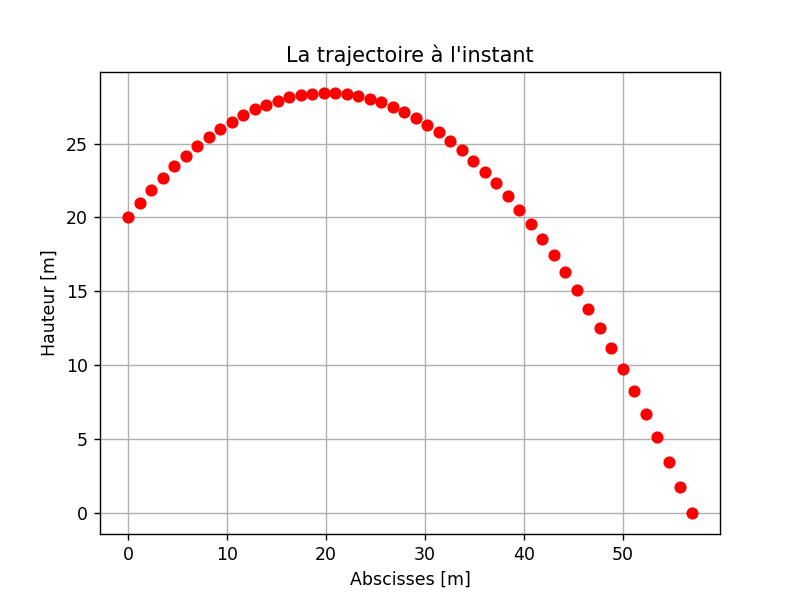

<IPython.core.display.Javascript object>


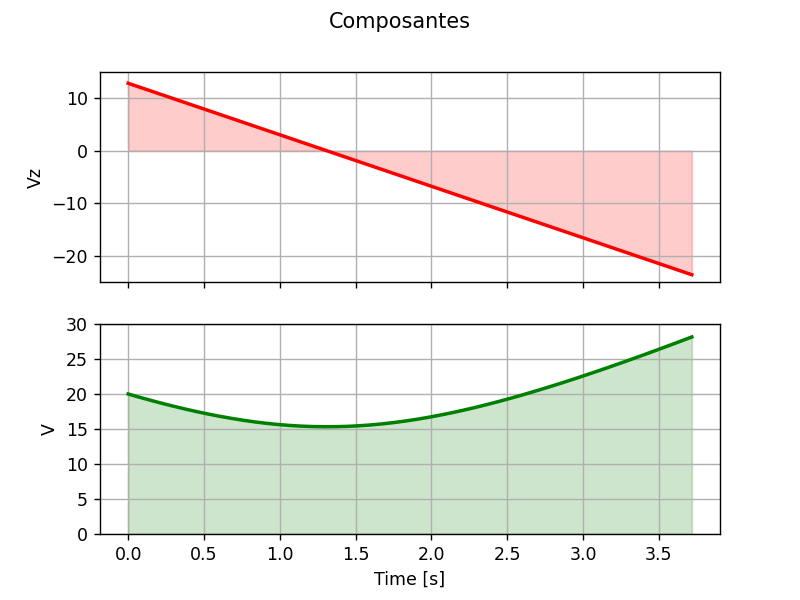

In [8]:
v_0, h, alpha = 20, 20, 40 
mod_simple = SimpleGravityModel(v_0=v_0,alpha=alpha,h=h)
impact = mod_simple.set_impact_values()
mod_simple.set_trajectory(impact["t_i"],50)
mod_simple.plot_trajectory()
mod_simple.plot_components()

## **<span style="color:navy">4 - Calcul et tracé de trajectoires multiples </span>**

Suivant le temps ce travail s'inscrira en travail personnel ou dans la seconde séance.

1. La prochaine étape consiste à dessiner plusieurs trajectoires sur un même graphique en ayant modifier  l'angle $\alpha$ qui varie de 20 à 70° par pas de 5°. Pour cela il faudra travailler **uniquement dans le script principal** en créant une fonction ou plusieurs fonctions spécifiques qui permet de boucler sur le calcul de la trajectoire en modifiant l'attribut de classe **alpha** et on doit trouver:
<center>
    <img src="images/trajectoires_multiples.png" width="500">
    Figure 3: différentes trajectoires en fonction de $\alpha$ 
</center>

2. Faire une seconde figure qui trace la portée maximale en fonction de l'angle $\alpha$ et en déduire la portée maximale pour une vitesse de $v_0$ = 20 m/s et $h=20$ m.

<center>
    <img src="images/portee_maxi.png" width="500">
    Figure 4: portée optimale en fonction de $\alpha$ 
</center>

3. Tracer la fonction $f(\alpha)$ et chercher avec une bonne précision la valeur de l'angle optimal.

3. S'il reste du temps, calculer l'altitude maximale atteinte ainsi que le temps correspond.


<IPython.core.display.Javascript object>


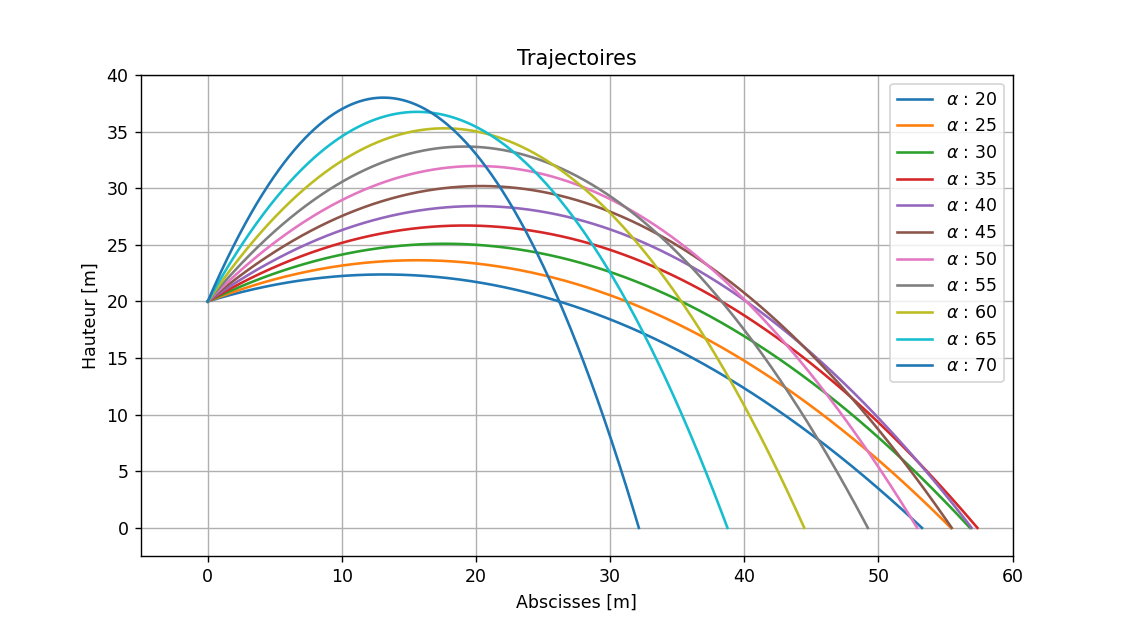

<IPython.core.display.Javascript object>


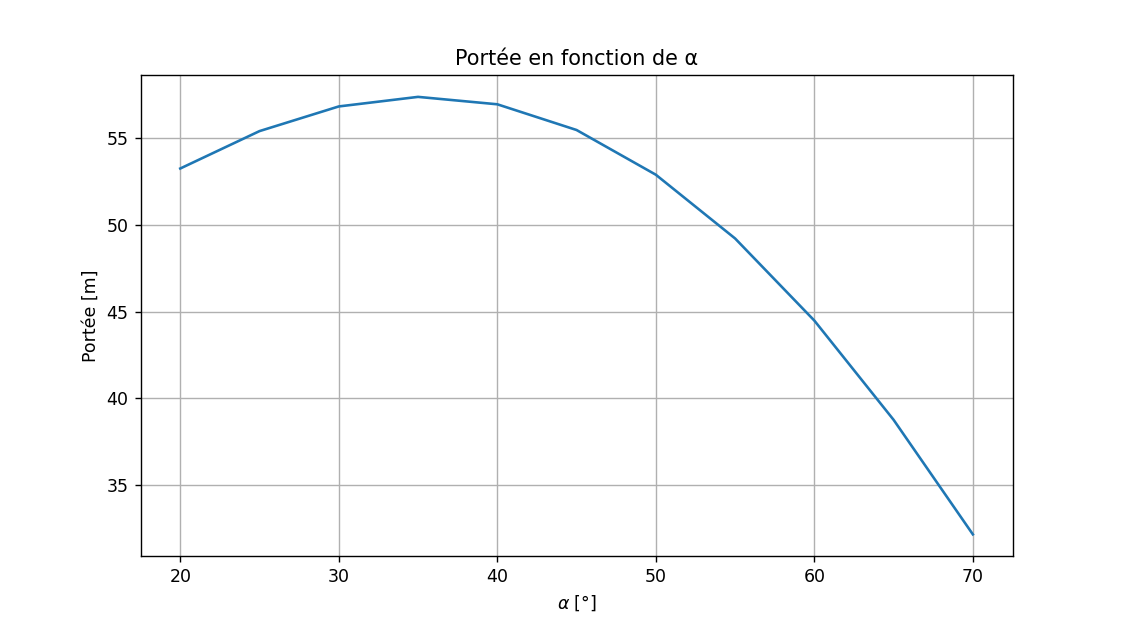

On observe que, pour une vitesse de v_0=20 m/s et h=20 m, la portée est maximale à α = 35 ° 
et y vaut 57.386547 m à 10⁻⁶ près


<IPython.core.display.Javascript object>


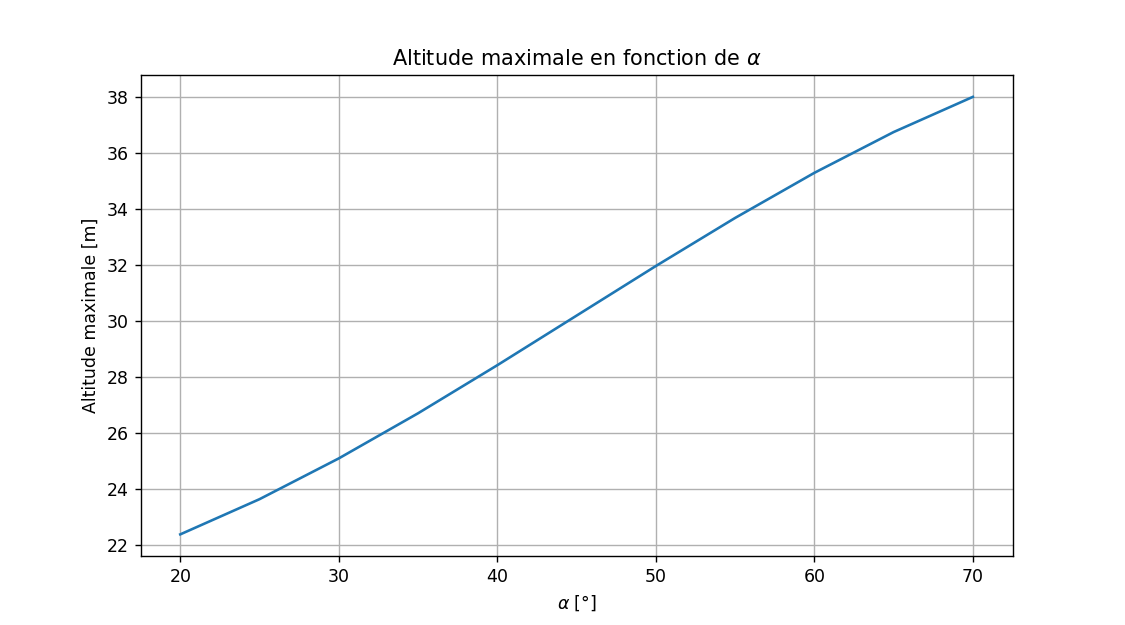

Toujours dans le but d'avoir une portée maximale, pour une vitesse de v_0=20 m/s et h=20 m, à α = 35 ° l'altitude maximale 
est de L = 27.7 m et le temps d'impact vaut t = 3.5 s


In [40]:
import numpy as np                # module de math
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

def plot_trajectories(v_0,h,angle):
    fig=plt.figure()
    fig.set_size_inches(9, 5)
    
    for angle in alpha:
        essai=SimpleGravityModel(v_0=v_0,h=h,alpha=angle)
        impact=essai.set_impact_values()
        essai.set_trajectory(impact["t_i"],1000)
        plt.plot(essai.x,essai.z)
        
    plt.legend([r'$\alpha$ : %a' %a for a in alpha], loc='upper right')
    plt.xlim([-5,60])
    plt.ylim([-2.5,40])
    plt.xlabel('Abscisses [m]')
    plt.ylabel('Hauteur [m]')
    plt.grid()
    plt.title("Trajectoires")
    plt.show()
    
def plot_maximum_distance(alpha):
    
    L=[]
    for angle in alpha:
        essai=SimpleGravityModel(v_0=v_0,h=h,alpha=angle)
        impact=essai.set_impact_values()
        L.append(impact["L"])
        
    fig=plt.figure()
    fig.set_size_inches(9, 5)
    plt.plot(alpha,L)
    plt.xlabel(r'$\alpha$ [°]')
    plt.ylabel('Portée [m]')
    plt.grid()
    plt.title("Portée en fonction de α")
    plt.show()

def optimal(alpha) :
    Lmax=0
    t=0
    i=0
    for angle in alpha:
        essai=SimpleGravityModel(v_0=v_0,h=h,alpha=angle)
        impact=essai.set_impact_values()
        if impact["L"]>=Lmax :
            Lmax=impact["L"]
            ang_max=angle
            t=impact['t_i']
    return Lmax, ang_max,t
def plot_maximum_altitude(alpha):
    
    alt=[]
    for angle in alpha:
        essai=SimpleGravityModel(v_0=v_0,h=h,alpha=angle)
        impact=essai.set_impact_values()
        essai.set_trajectory(impact["t_i"],10000)
        alt.append(max(essai.z))
        
    fig=plt.figure()
    fig.set_size_inches(9, 5)
    plt.plot(alpha,alt)
    plt.xlabel(r'$\alpha$ [°]')
    plt.ylabel('Altitude maximale [m]')
    plt.grid()
    plt.title("Altitude maximale en fonction de " r'$\alpha$')
    plt.show()
    
alpha = np.arange(20, 71, 5)
v_0, h = 20, 20 
plot_trajectories(v_0,h,alpha)
plot_maximum_distance(alpha)
Lmax, angmax,timpact =optimal(alpha)
print("On observe que, pour une vitesse de v_0=20 m/s et h=20 m, la portée est maximale à α=", angmax ,'° \net y vaut',
      round(Lmax,6),u'm à 10\u207B\u2076 près')
plot_maximum_altitude(alpha)
print("Toujours dans le but d'avoir une portée maximale, pour une vitesse de v_0=20 m/s et h=20 m, à α=", angmax ,
      "° l'altitude maximale \nest de L = 27.7 m et le temps d'impact vaut t =",round(timpact,2),'s' )


In [1]:
%%html
 <style>
 div.input {
      display: none;
      padding: 0;
    }

    div.output_prompt {
      display: none;
      padding: 0;
    }

    div.text_cell_render {
      padding: 1pt;
    }

    div#notebook p,
    div#notebook,
    div#notebook li,
    p {
      font-size: 11pt;
      line-height: 135%;
      margin: 0;
    }

    .rendered_html h1,
    .rendered_html h1:first-child {
      font-size: 16pt;
      margin: 7pt 0;
    }

    .rendered_html h2,
    .rendered_html h2:first-child {
      font-size: 14pt;
      margin: 6pt 0;
    }

    .rendered_html h3,
    .rendered_html h3:first-child {
      font-size: 13pt;
      margin: 6pt 0;
    }

    div.output_subarea {
      padding: 0;
    }
 </syle>